
<div style="padding: 20px;
            color: white;
            margin: 10px;
            font-size: 200%;
            text-align: center;
            display: flex;
            align-items: center;
            justify-content: center;
            border-radius: 20px;
            background-color: #E9755C;
            overflow: hidden;
            font-weight: bold;
            text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5);">
            Home Loan Approval Using Decision Tree.
</div>

----

**Dataset : https://www.kaggle.com/datasets/rishikeshkonapure/home-loan-approval**

---

#### `About Company`
Dream Housing Finance company deals in all home loans. They have presence across all urban, semi urban and rural areas. Customer first apply for home loan after that company validates the customer eligibility for loan.
#### `Problem`
Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers. Here they have provided a partial data set.

---

#### `Dataset Description`:

| Variable | Description | 
|------|------|
| Loan_ID | Unique Loan ID | 
| Gender | Male/ Female | 
| Married | Applicant married (Y/N) | 
| Dependents | Number of dependents | 
| Education | Applicant Education (Graduate/ Under Graduate) | 
| Self_Employed | Self employed (Y/N) | 
| ApplicantIncome | Applicant income | 
| CoapplicantIncome | Coapplicant income | 
| LoanAmount | Loan amount in thousands | 
| Loan_Amount_Term | Term of loan in months | 
| Credit_History | credit history meets guidelines | 
| Property_Area | Urban/ Semi Urban/ Rural | 
| Loan_Status | Loan approved (Y/N) | 

------------------

## 1. Import Libraries .

In [85]:
## main Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import missingno as msno
import plotly.express as px
from plotly.offline import init_notebook_mode

## split data
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

## Pipeline
from sklearn.pipeline import Pipeline , FeatureUnion
from sklearn_features.transformers import DataFrameSelector

## preprocessing 
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import RobustScaler,OrdinalEncoder #, OneHotEncoder, LabelEncoder 

## imbalanced data
from imblearn.over_sampling import SMOTE

## metrics 
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay

## tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

## Customize Seaborn
sns.set(rc={"figure.figsize" : [12,8]}, style="whitegrid", font_scale=1.2)
sns.set_palette("flare") ## pastel
## Customize Plotly
px.defaults.template = "plotly_white"
init_notebook_mode(connected=True)
pd.set_option('display.max_column',None)
## warnings ignore
import warnings 
warnings.filterwarnings('ignore')

------------

## 2. Load the Dataset  and Inspecting it .

In [4]:
## using pandas
PATH = '/kaggle/input/home-loan-approval/loan_sanction_train.csv'
df = pd.read_csv(PATH)

In [5]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
df.shape ## return num of rows and cols..

(614, 13)

In [7]:
df.info() ## information about the dataset such as datatyps..

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


**Clearly, there are missing values in the data.**

In [8]:
pd.DataFrame(round((df.isnull().mean() * 100), 2), columns=["Ratio_of_missing_vals."]) ## check missing values

,Ratio_of_missing_vals.
Loan_ID,0.00
Gender,2.12
Married,0.49
Dependents,2.44
Education,0.00
Self_Employed,5.21
ApplicantIncome,0.00
CoapplicantIncome,0.00
LoanAmount,3.58
Loan_Amount_Term,2.28


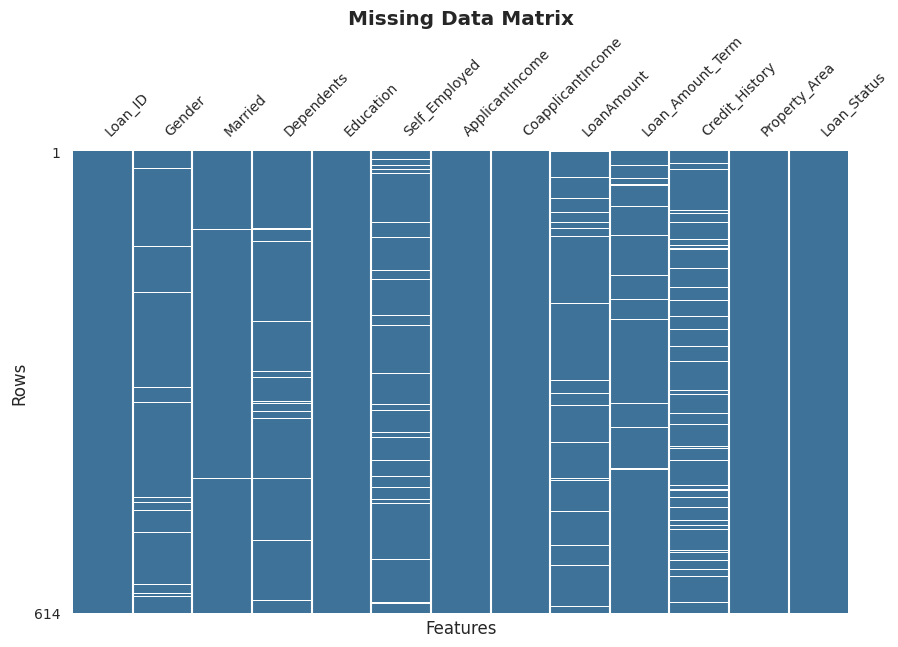

In [9]:
# Create the missing data matrix
msno.matrix(df, figsize=(10, 6), sparkline=False, color=(0.25, 0.45, 0.6)) ## color = RGB

# Customize the plot
plt.title('Missing Data Matrix', weight="bold")
plt.xlabel('Features', fontsize=12)
plt.ylabel('Rows', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Show the plot
plt.show()

In [10]:
df.duplicated().any()

False

- **There are missing values in the data.**
- **There are no duplicate rows.**

In [11]:
## df_train.dropna(inplace=True, axis=0) ## drop null.. 

In [12]:
## check nulls again
## pd.DataFrame(round((df_train.isnull().mean() * 100), 2), columns=["Ratio_of_missing_vals."]) ## check missing values

In [13]:
df.describe(include="number") ## statistical info. about the Numerical cols.

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


`Note :`
- **Mean income of the applicant : 5403.46**
- **Mean income of the Co Applicant : 1621.25**
- **Mean of Loan amount : 146.41**
- **Mean Term of loan : 342**

In [14]:
df.describe(exclude="number") ## statistical info. about the Categorical cols.

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP001002,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


In [15]:
## drop irrelavant column
df.drop("Loan_ID", axis=1, inplace=True)

----------

## 3. EDA

### `3.1 Univariate analysis`

#### `3.1.1 Numerical Columns` 

`ApplicantIncome`

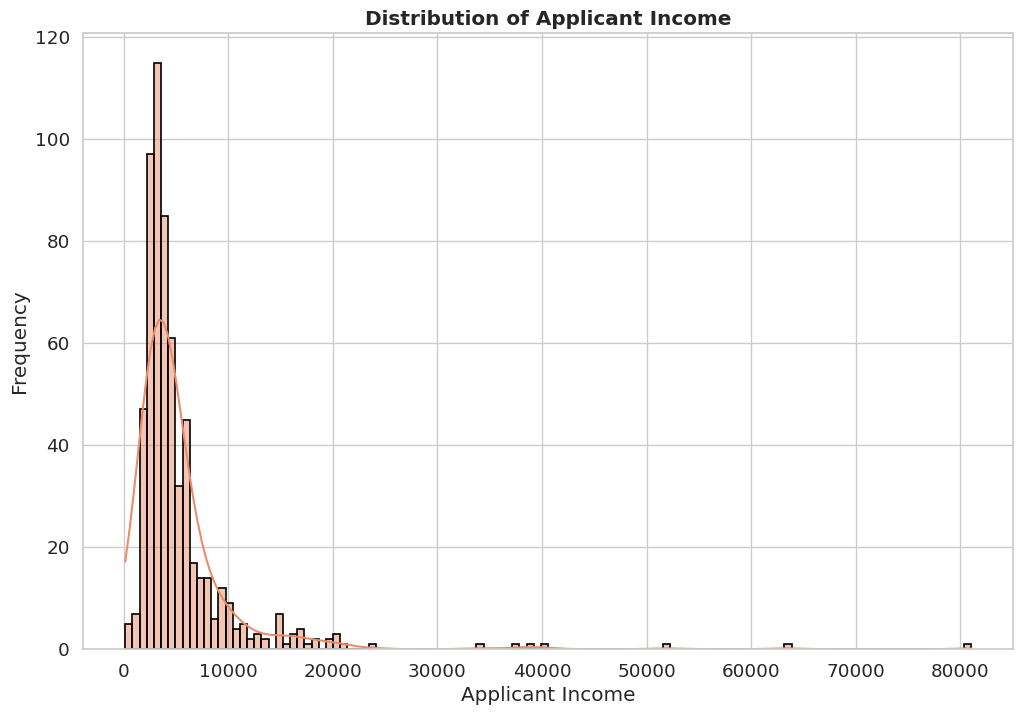

In [16]:
# Plotting the histogram
sns.histplot(data=df, x="ApplicantIncome", kde=True, edgecolor="black", linewidth=1.2)

# Customizing the plot
plt.title("Distribution of Applicant Income", weight="bold")
plt.xlabel("Applicant Income")
plt.ylabel("Frequency")

# Display the plot
plt.show()

<h4 style = "text-align:center; font-size:110%">Based on the provided histogram plot, it is evident that there are outliers in the data, as there are a few data points that deviate significantly from the majority of the values. Most of the income values range from 150 to 10000.</h4>

In [17]:
df["ApplicantIncome"].agg(["min", "max"])

min      150
max    81000
Name: ApplicantIncome, dtype: int64

`CoapplicantIncome`

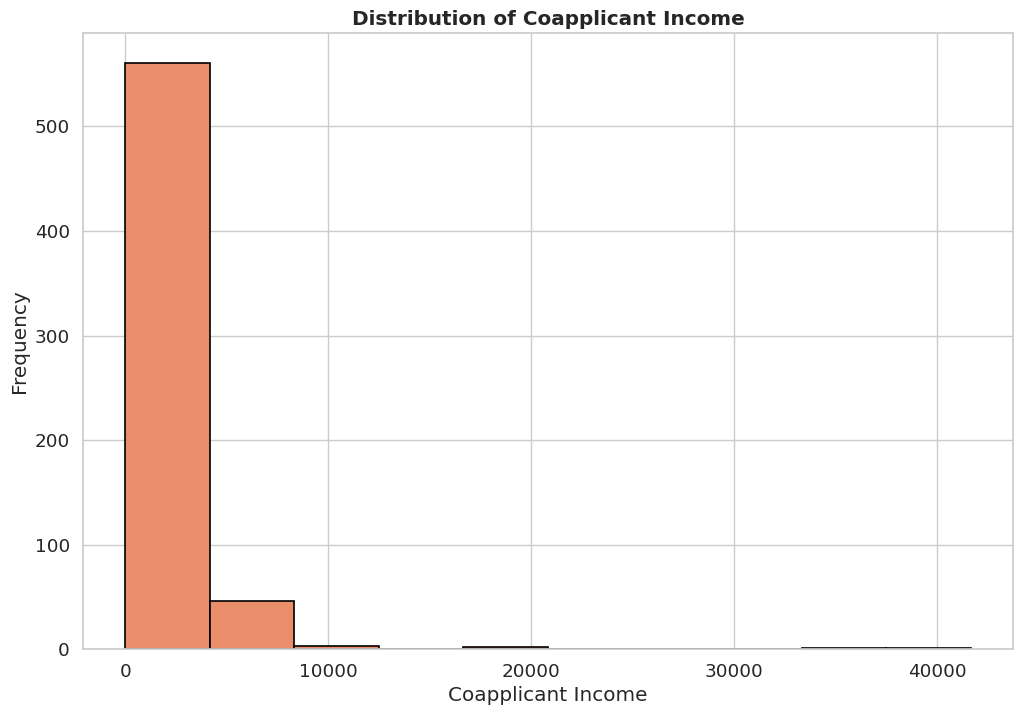

In [18]:
plt.hist(x=df["CoapplicantIncome"], edgecolor="black", linewidth=1.2)

plt.title("Distribution of Coapplicant Income", weight="bold")
plt.xlabel("Coapplicant Income")
plt.ylabel("Frequency")

plt.show()

<h4 style = "text-align:center; font-size:110%">Most of the coapplicant income values range from 0 to 3000. Additionally, it is evident that there are also outliers present in the data.</h4>

`LoanAmount`

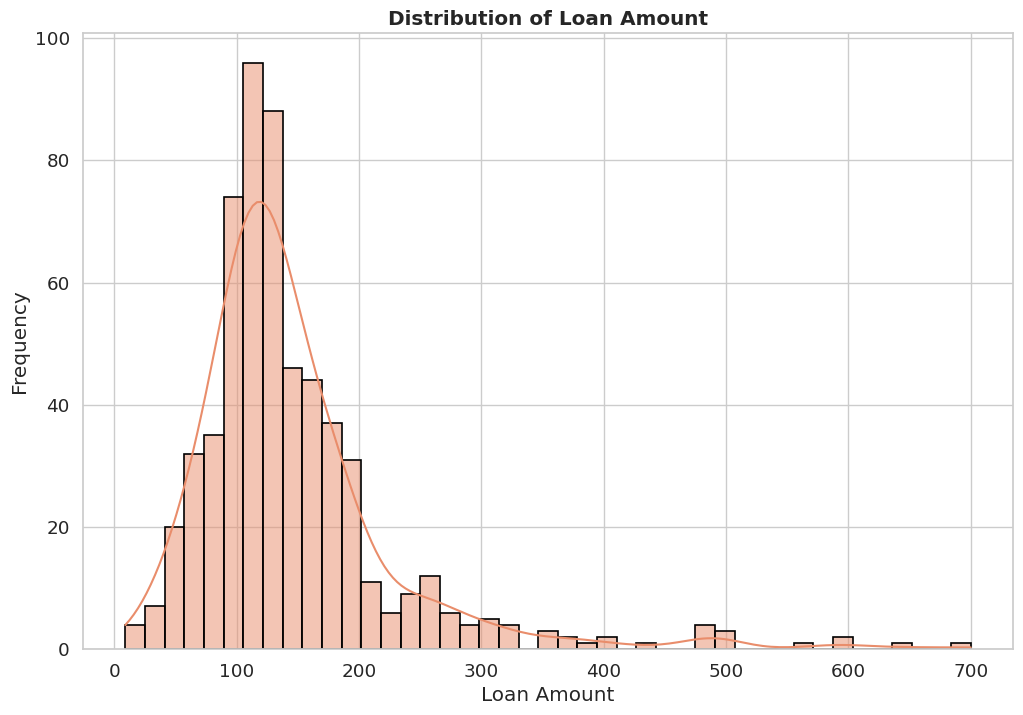

In [19]:
# Plotting the histogram
sns.histplot(data=df, x="LoanAmount", kde=True, edgecolor="black", linewidth=1.2)

plt.title("Distribution of Loan Amount", weight="bold")
plt.xlabel("Loan Amount")
plt.ylabel("Frequency")

plt.show()

<h4 style = "text-align:center; font-size:110%">Most of the loan amount values range from 9 to 200. This can be observed from the histogram plot.</h4>

`Loan_Amount_Term`

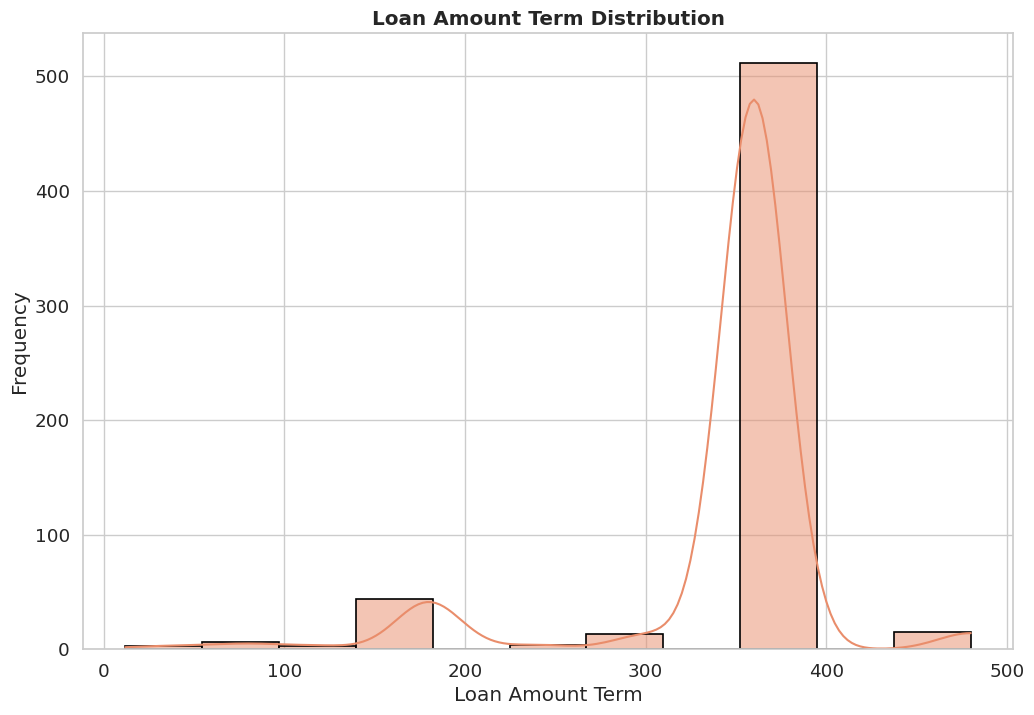

In [20]:
# Create the histogram plot
sns.histplot(data=df, x="Loan_Amount_Term", kde=True, edgecolor="black", linewidth=1.2)

# Customization options
plt.title("Loan Amount Term Distribution", weight="bold")  # Set the plot title
plt.xlabel("Loan Amount Term")  # Set the x-axis label
plt.ylabel("Frequency")  # Set the y-axis label

# Show the plot
plt.show()

**Most loans have a term of 400 months**

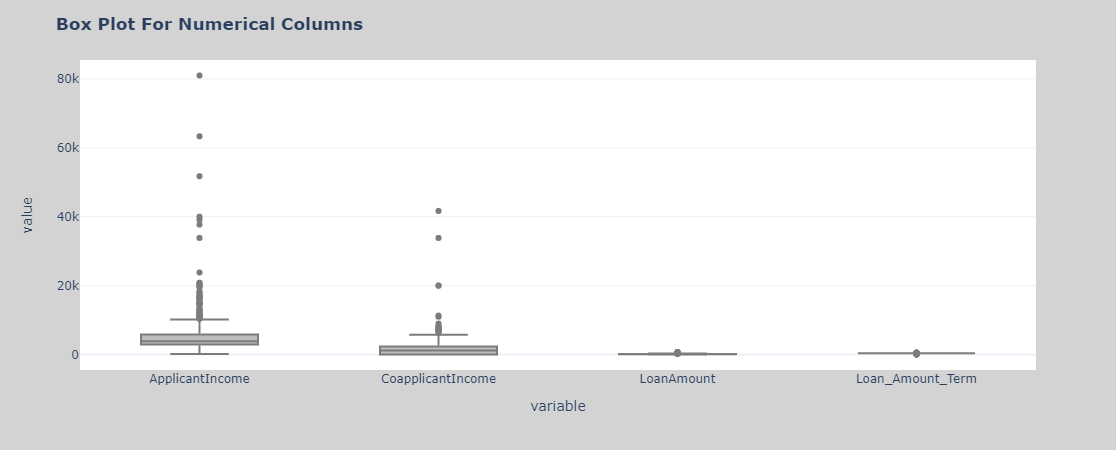

In [21]:
# Create the box plot
fig = px.box(
    df[["ApplicantIncome", "CoapplicantIncome", "LoanAmount", "Loan_Amount_Term"]],
    color_discrete_sequence=px.colors.qualitative.Antique_r
)

# Customize the plot
fig.update_layout(
    title="<b>Box Plot For Numerical Columns",
    paper_bgcolor="lightgray",
    plot_bgcolor="white",
)

# Show the plot
fig.show()

<h4 style = "text-align:center; font-size:110%">I won't drop the outliers; instead, I'll use RobustScaler for scaling.</h4>

#### `3.1.2  Categorical Columns` 

`Credit_History`
**A credit history is a record of a borrower’s responsible repayment of debts. A credit report is a record of the borrower’s credit history from a number of sources, including banks, credit card companies, collection agencies, and governments.**
***source : https://discuss.analyticsvidhya.com/t/i-did-not-understand-credit-history-variable-can-any-one-help-me-with-the-explanation-please/10177/7***

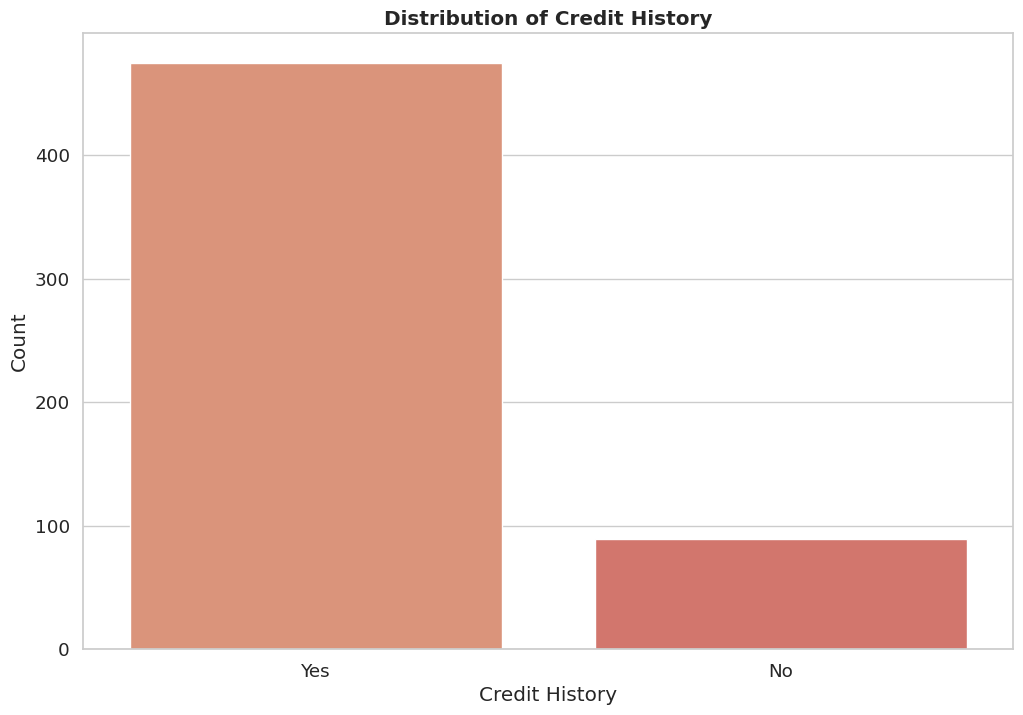

In [22]:
df['Credit_History'] = df['Credit_History'].map({1: "Yes", 0: "No"})

## Create countplot ==> Credit_History
sns.countplot(data=df, x="Credit_History")

## labels and title
plt.xlabel("Credit History")
plt.ylabel("Count")
plt.title("Distribution of Credit History", weight="bold")

## Show the plot
plt.show()

<h4 style = "text-align:center; font-size:110%">Most applicants have a credit history value of Yes (good credit history).</h4>


`Gender`

Gender
Male      489
Female    112
Name: count, dtype: int64
**************************************************


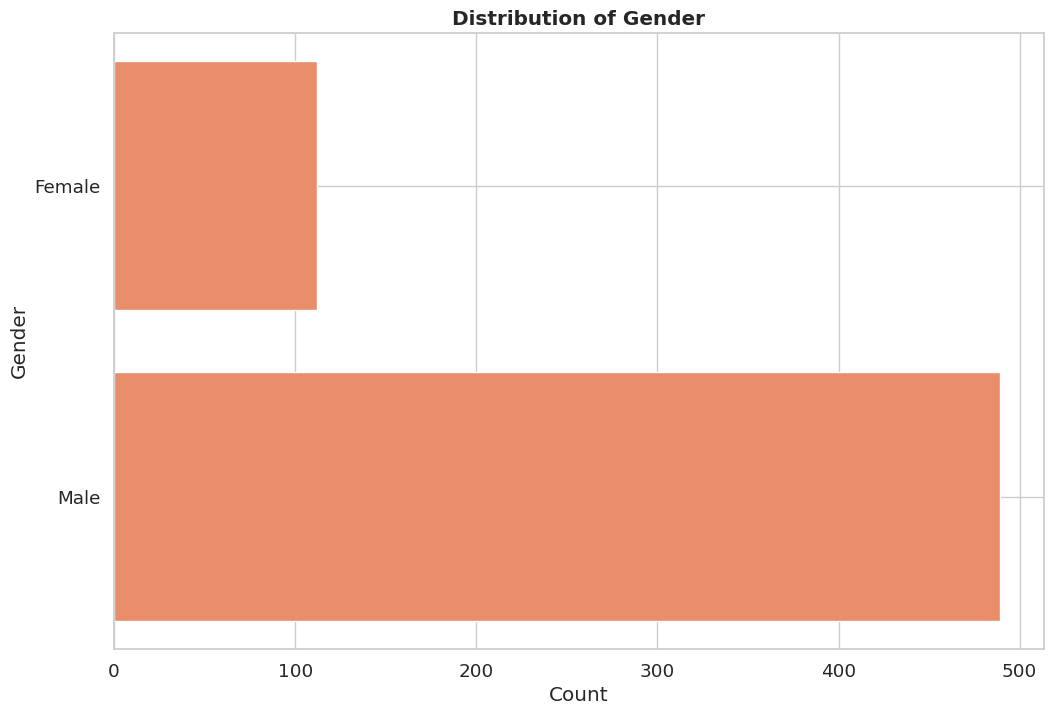

In [23]:
Gender_count = df["Gender"].value_counts() # Get the value counts of "Gender"
print(Gender_count)
print("*"*50)
## Create a horizontal bar plot
plt.barh(y=Gender_count.index, width=Gender_count.values)

## labels and title
plt.xlabel("Count")
plt.ylabel("Gender")
plt.title("Distribution of Gender", weight="bold")

## Show the plot
plt.show()

<h4 style = "text-align:center; font-size:110%">From the above graph, it can be observed that the majority of the applicants are males.</h4>


`Married`

In [24]:
married_count = df["Married"].value_counts()
married_count

Married
Yes    398
No     213
Name: count, dtype: int64

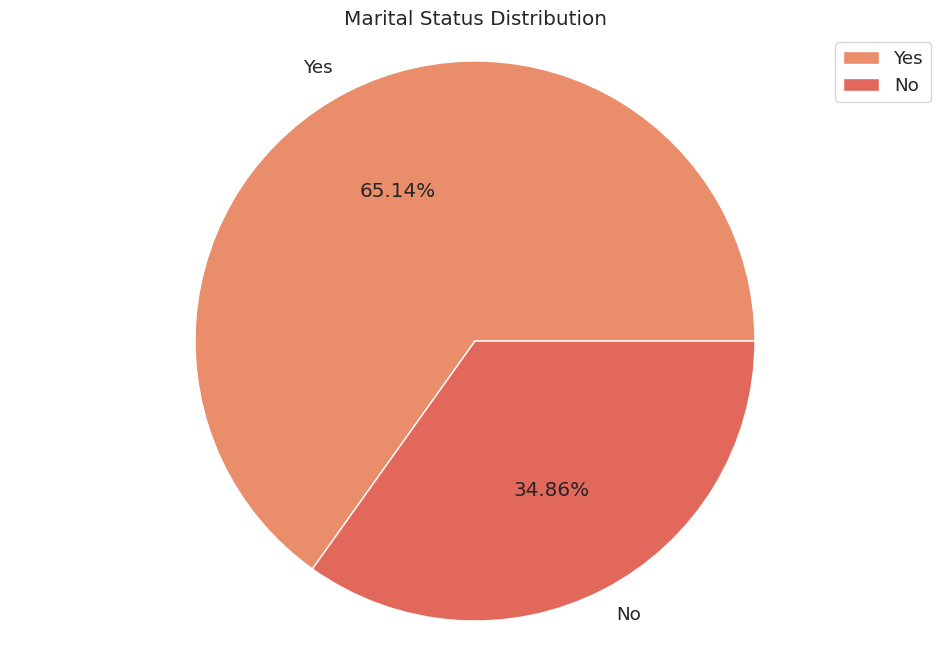

In [25]:
## Create a pie chart
plt.pie(x=married_count.values, labels=married_count.index, autopct="%0.2f%%")

## title
plt.title("Marital Status Distribution")

## Customize the styling
plt.axis("equal")  # Set the aspect ratio to make the pie circular

## Add a legend
plt.legend(loc='best')

## Show the plot
plt.show()

**65% of the people in the dataset are married.**

`Dependents`

In [26]:
df["Dependents"].unique() ## unique values in Dependents feature

array(['0', '1', '2', '3+', nan], dtype=object)

In [27]:
## Mapping values in the "Dependents" column to more descriptive labels
df["Dependents"] = df["Dependents"].map(
        {
            "0": "Zero",
            "1" : "One",
            "2" : "Two",
            "3+" : "Three or more"
        }
)

In [28]:
df["Dependents"].value_counts(normalize=True) 

Dependents
Zero             0.575960
One              0.170284
Two              0.168614
Three or more    0.085142
Name: proportion, dtype: float64

`Education`

In [29]:
df["Education"].value_counts(normalize=True).to_frame()

,proportion
Education,
Graduate,0.781759
Not Graduate,0.218241


              proportion
Education               
Graduate        0.781759
Not Graduate    0.218241
**************************************************


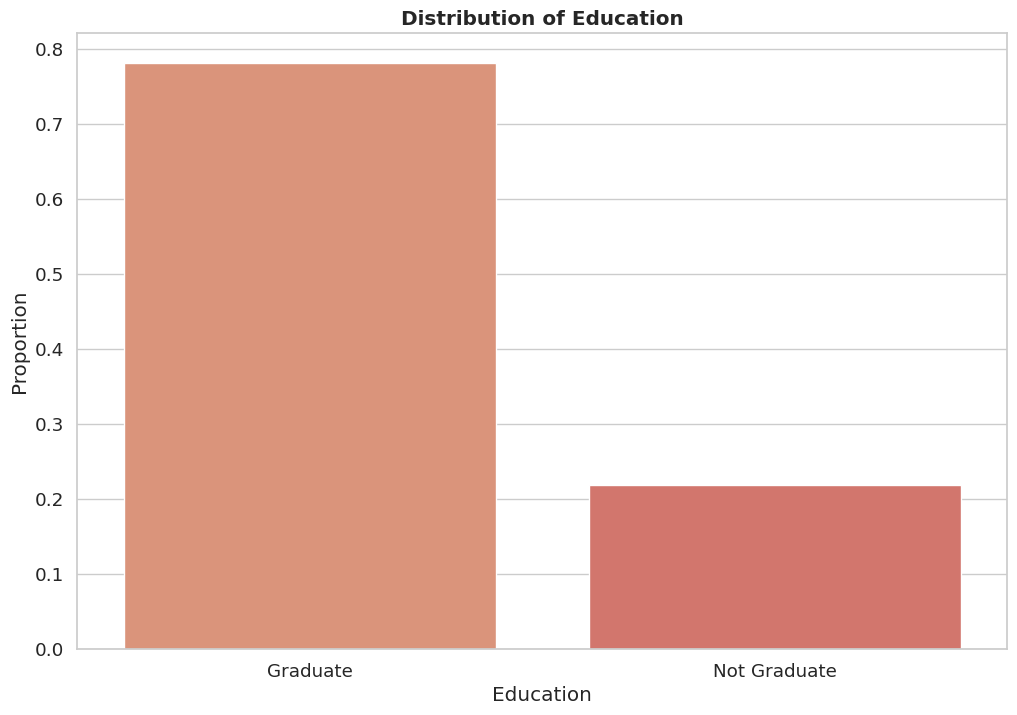

In [34]:
## Calculate the normalized value counts of "Education"
education_count = df["Education"].value_counts(normalize=True).to_frame()
print(education_count)
print("*"*50)

## Create a bar plot
sns.barplot(x=education_count.index, y="proportion", data=education_count)

## labels and title
plt.xlabel("Education")
plt.ylabel("Proportion")
plt.title("Distribution of Education", weight="bold")

## Show the plot
plt.show()

**Most loan applicants are graduates**

`Self_Employed`

In [35]:
df["Self_Employed"].value_counts(normalize=True).to_frame()

,proportion
Self_Employed,
No,0.859107
Yes,0.140893


**Most loan applicants are not self-employed.**

`Property_Area`

Property_Area
Semiurban    233
Urban        202
Rural        179
Name: count, dtype: int64
**************************************************


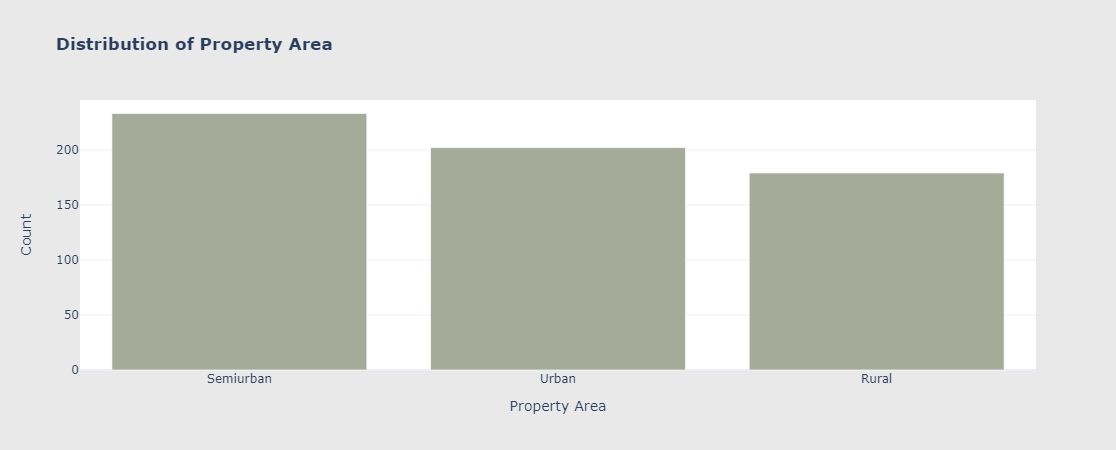

In [36]:
## Calculate the value counts of "Property_Area"
property_count = df["Property_Area"].value_counts()
print(property_count)
print("*"*50)
## Create a bar plot using Plotly
fig = px.bar(x=property_count.index, y=property_count.values, labels={"x": "Property Area", "y": "Count"},
                 title="<b>Distribution of Property Area", color_discrete_sequence=px.colors.qualitative.Bold_r)

## Customize the plot
fig.update_layout(
    paper_bgcolor="rgb(233,233,233)",
    plot_bgcolor="white",
)

## Show the plot
fig.show()

**Most of the loan applicants are from semi-urban areas.**

`Loan_Status`
- **target**

Loan_Status
Y    422
N    192
Name: count, dtype: int64
**************************************************


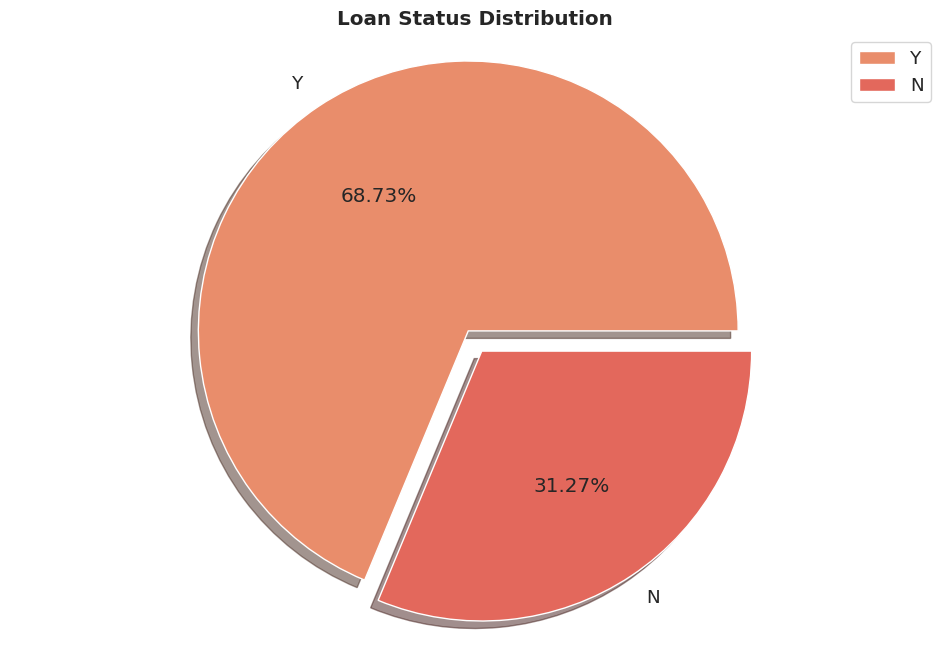

In [37]:
loan_count = df["Loan_Status"].value_counts()
print(loan_count)
print("*"*50)
## Create a pie chart
plt.pie(x=loan_count.values, labels=loan_count.index, autopct="%0.2f%%", shadow=True, explode=(0, 0.09))

## title
plt.title("Loan Status Distribution", weight="bold")

## Customize the styling
plt.axis("equal")  # Set the aspect ratio to make the pie circular

## Add a legend
plt.legend(loc='best')

## Show the plot
plt.show()

<h4 style = "text-align:center; font-size:110%">The target feature in this dataset represents the loan approval status, whether it is accepted or not. It is important to note that the classes in this target variable are imbalanced, meaning there is a significant difference in the number of instances between the accepted and non-accepted loan status.</h4>

### `3.1 Bi-variate Analysis  & Multi-variate Analysis`

#### `1. Is there a relationship between the applicant's income and loan amount requested?`

In [38]:
## ApplicantIncome and LoanAmount
print(f'the Correlation between the Applicant Income and LoanAmount is \
      {round(df[["ApplicantIncome" ,"LoanAmount"]].corr(),2).iloc[0,1]}')

the Correlation between the Applicant Income and LoanAmount is       0.57


- **There is a strong relationship between the applicant's income and the loan amount requested.**

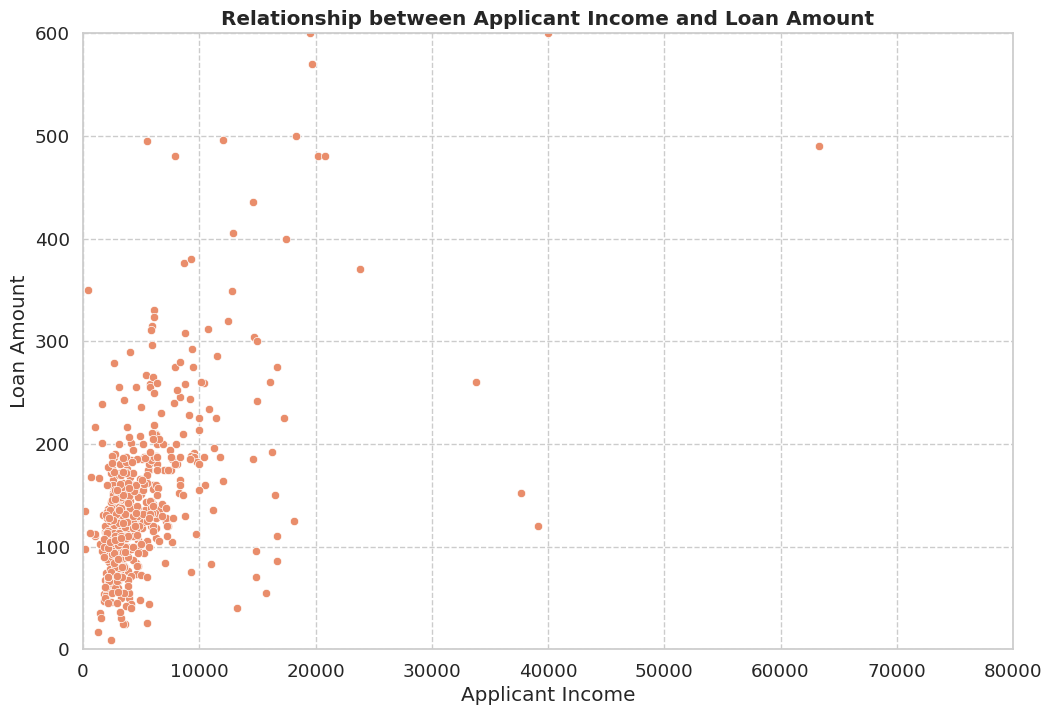

In [39]:
## Create a scatter plot
sns.scatterplot(data=df, x="ApplicantIncome", y="LoanAmount")

## labels and title
plt.xlabel("Applicant Income")
plt.ylabel("Loan Amount")
plt.title("Relationship between Applicant Income and Loan Amount", weight="bold")

## style settings
plt.grid(True, linestyle="--")  # Add grid lines
plt.xlim(0, 80000)  # Set the x-axis limits
plt.ylim(0, 600)  # Set the y-axis limits

## Show the plot
plt.show()

#### `2. Does the loan approval status vary based on the applicant's gender?`

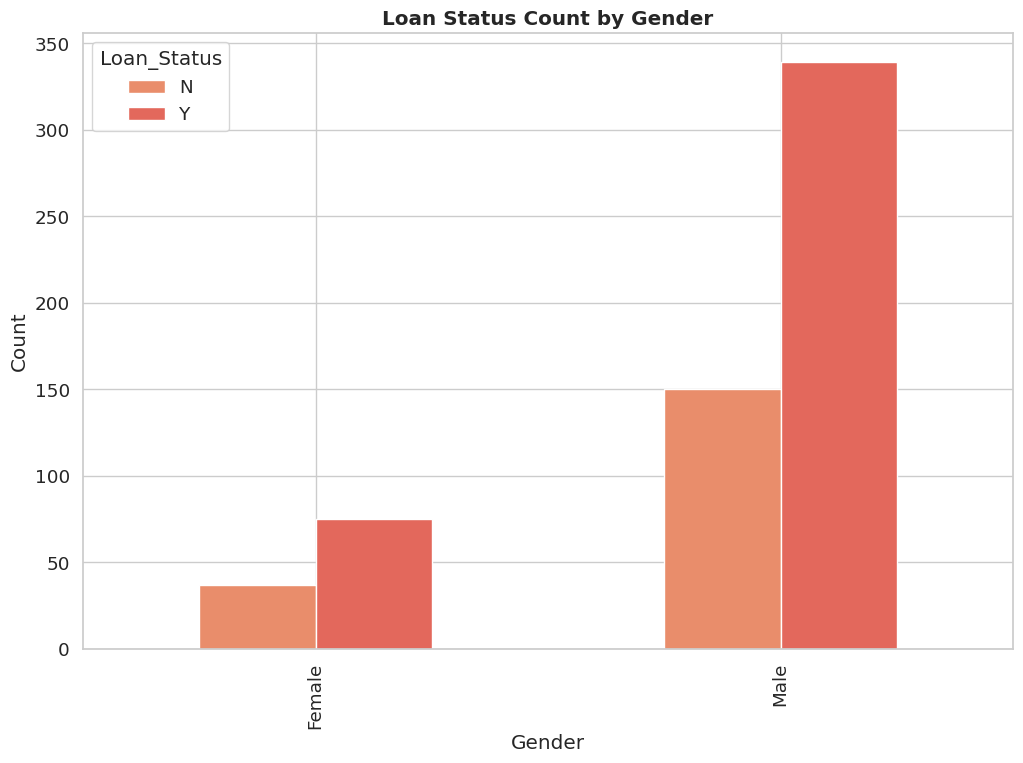

In [40]:
## Group the data by "Gender" and "Loan_Status" and calculate the count
loan_status_count = df.groupby(["Gender", "Loan_Status"])["Gender"].count().unstack()

## bar plot
loan_status_count.plot(kind="bar", stacked=False)

## labels and title
plt.xlabel("Gender")
plt.ylabel("Count")
plt.title("Loan Status Count by Gender", weight="bold")

## Show the plot
plt.show()

In [41]:
print("the ratio of female rejected",
      round((loan_status_count.iloc[0,0]) / (loan_status_count.iloc[0,:].sum(axis=0)),3)*100)
print("the ratio of male rejected",
      round((loan_status_count.iloc[1,0]) / (loan_status_count.iloc[1,:].sum(axis=0)),3)*100)

the ratio of female rejected 33.0
the ratio of male rejected 30.7


<h4 style = "text-align:center; font-size:110%">There is no clear relationship between gender and loan status approval. However, the proportion of women whose loan applications are rejected is higher (33%) compared to men (30%).
</h4>

#### `3. What is the distribution of loan approval status for different education levels?`

In [42]:
df.groupby(["Education", "Loan_Status"])["Loan_Status"].count()

Education     Loan_Status
Graduate      N              140
              Y              340
Not Graduate  N               52
              Y               82
Name: Loan_Status, dtype: int64

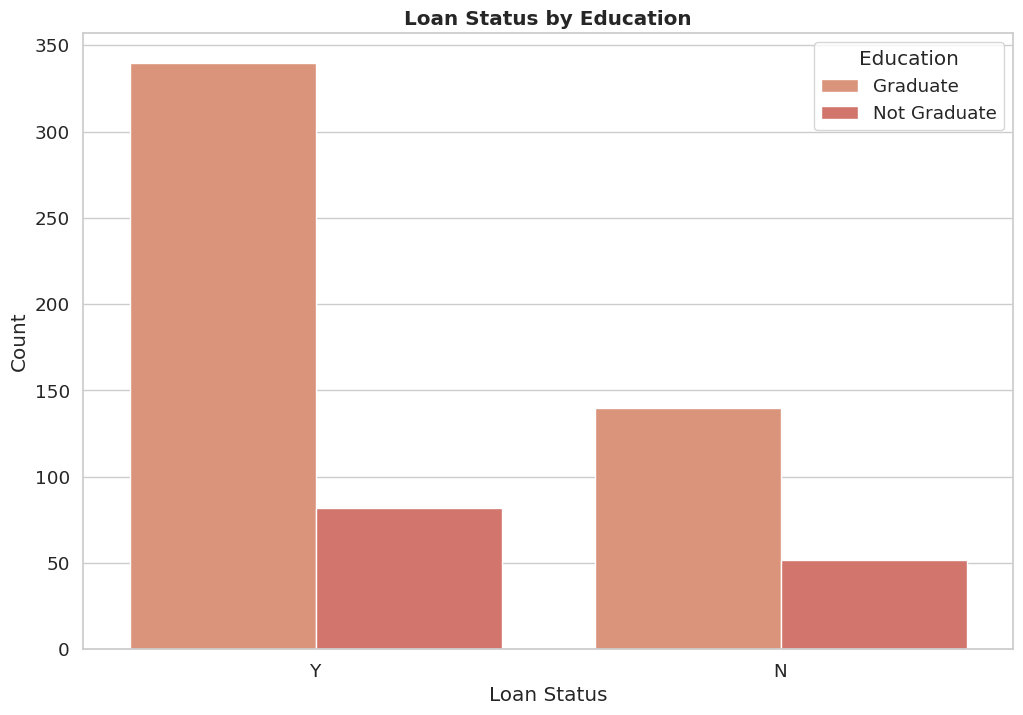

In [43]:
# Creating a count plot for "Loan_Status" with the hue based on "Education"
sns.countplot(data=df, x="Loan_Status", hue="Education")
plt.xlabel("Loan Status")   ## X-axis label
plt.ylabel("Count")          ## Y-axis label
plt.title("Loan Status by Education", weight="bold")  ## Plot title
plt.legend(title="Education", loc="upper right") ## legend
plt.show()

#### `4.Is there a correlation between the applicant's credit history and loan approval status?`

Loan_Status  Credit_History
N            No                 82
             Yes                97
Y            No                  7
             Yes               378
Name: Loan_Status, dtype: int64
**************************************************


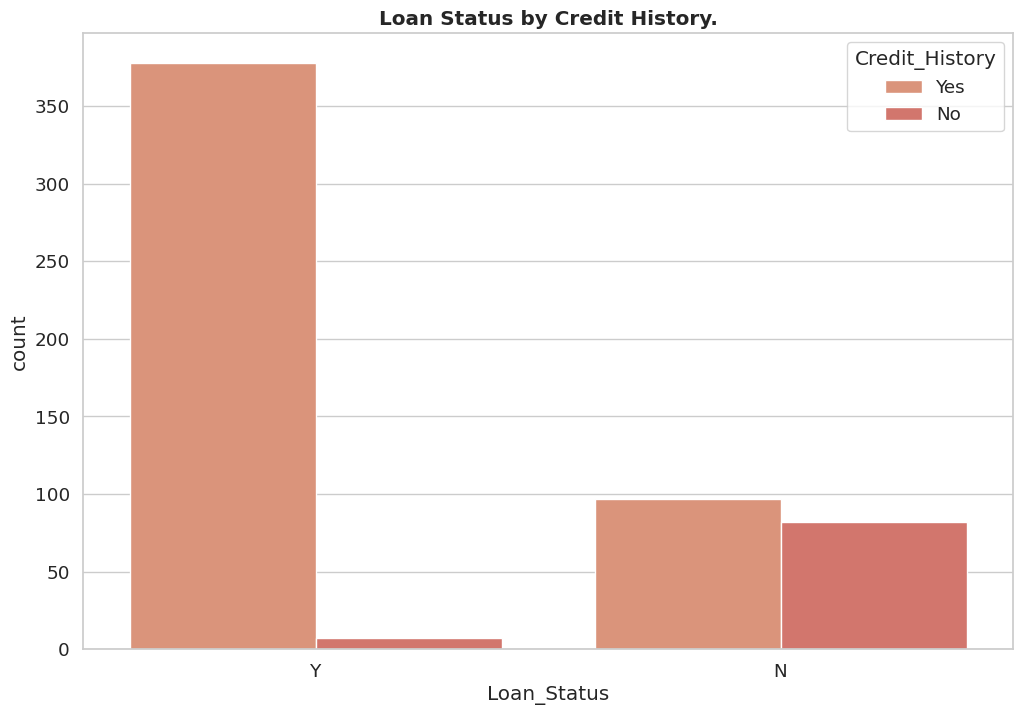

In [44]:
print(df.groupby(["Loan_Status", "Credit_History"])["Loan_Status"].count())
print("*"*50)
sns.countplot(data=df, x="Loan_Status", hue="Credit_History")
plt.title("Loan Status by Credit History.", weight="bold")
plt.show()

**Mostly, anyone with a credit history of 1 (Yes) will be accepted**

#### `5.How does the loan approval status differ for married and unmarried applicants?`

In [45]:
loan_status_married = df.groupby(["Loan_Status", "Married"])["Married"].count().unstack()
loan_status_married

Married,No,Yes
Loan_Status,,
N,79,113
Y,134,285


In [46]:
print("the ratio of Non-married rejected".title(),
      round((loan_status_married.iloc[0,0]) / (loan_status_married.iloc[0,:].sum(axis=0)),2)*100)
print("the ratio of married rejected".title(),
      round((loan_status_married.iloc[1,0]) / (loan_status_married.iloc[1,:].sum(axis=0)),2)*100)

The Ratio Of Non-Married Rejected 41.0
The Ratio Of Married Rejected 32.0


**The percentage of single people whose loans are rejected is higher than the percentage of married people.**

#### `6.  Does the loan amount vary based on the applicant's property area?`

In [47]:
df.groupby("Property_Area")["LoanAmount"].agg(["sum","mean","count"]).sort_values(by="mean", ascending=False)

,sum,mean,count
Property_Area,,,
Rural,26341.0,152.260116,173
Semiurban,33175.0,145.504386,228
Urban,27160.0,142.198953,191


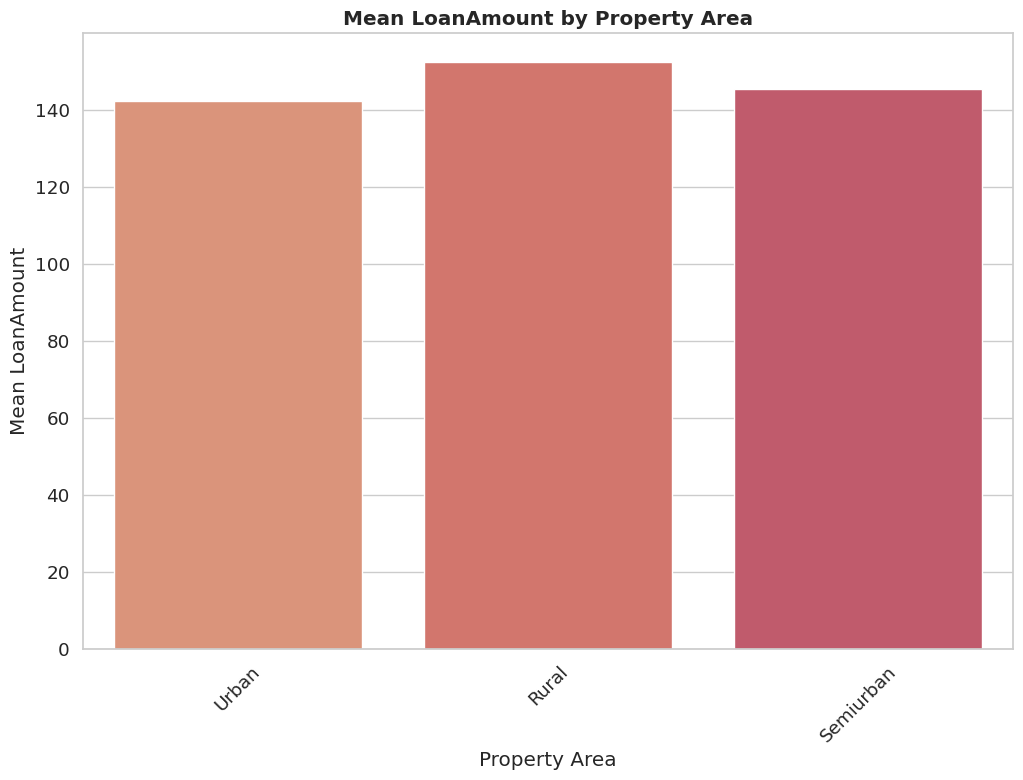

In [48]:
# Create the bar plot
sns.barplot(data=df, x="Property_Area", y="LoanAmount", errorbar=None, estimator="mean")

# Customize the plot
plt.title("Mean LoanAmount by Property Area", weight="bold")
plt.xlabel("Property Area")
plt.ylabel("Mean LoanAmount")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Show the plot
plt.show()

**The average Loan Amount in the "Rural" area is higher than in the other areas.**

#### `7.Is there a relationship between the applicant's dependents and loan approval status?`

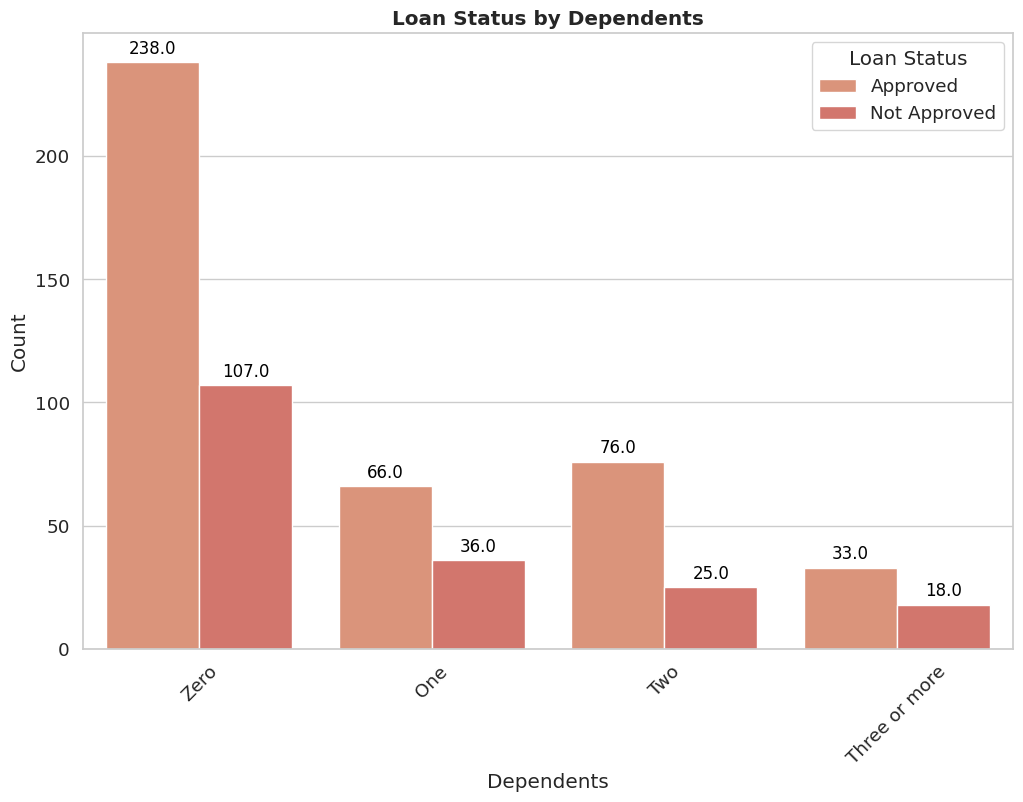

In [49]:
# Create the countplot
ax = sns.countplot(data=df, x="Dependents", hue="Loan_Status")

## plot customize
ax.set_title("Loan Status by Dependents", weight="bold")
ax.set_xlabel("Dependents")
ax.set_ylabel("Count")
ax.legend(title="Loan Status", labels=["Approved", "Not Approved"])  ## legend labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)  # Rotate x-axis labels 

# Add data labels
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 10),
                textcoords='offset points')

# Show the plot
plt.show()

- **For most loan applicants, the number of dependents is 0.**
- **The highest percentage of approved loans are for customers with no dependents.**

#### `8. What is the distribution of loan approval status for different employment types?`

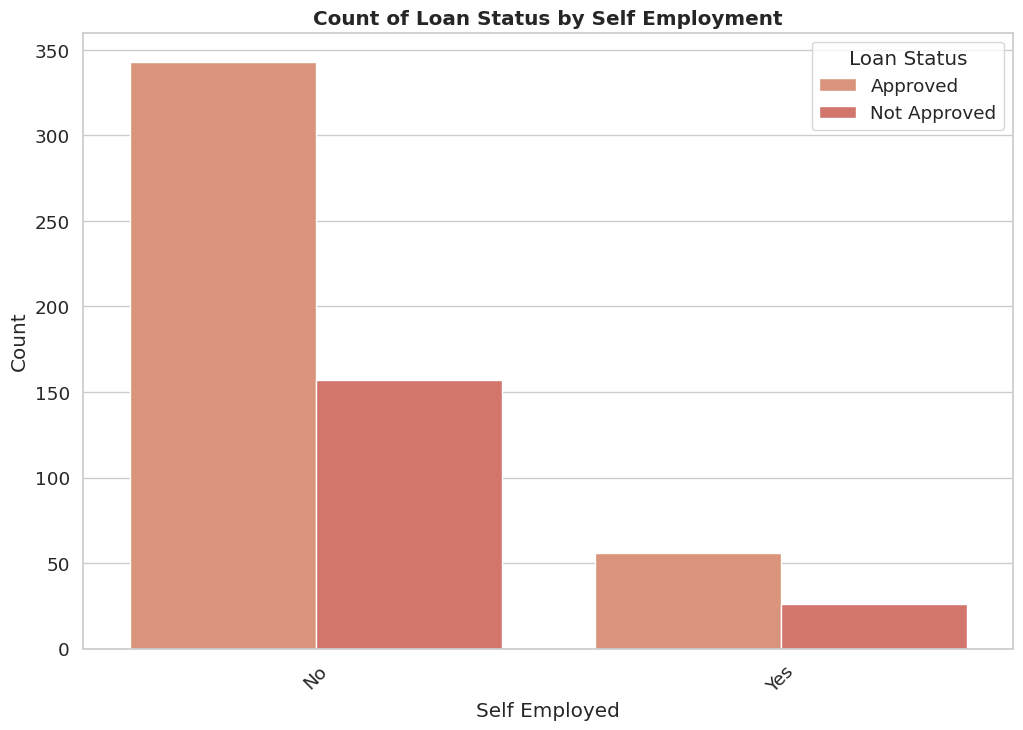

In [50]:
## Create the countplot
countplot = sns.countplot(data=df, x="Self_Employed", hue="Loan_Status")  # Customize the color palette

## Add labels and a title
countplot.set(xlabel="Self Employed", ylabel="Count")
plt.title("Count of Loan Status by Self Employment", weight="bold")

## set legend
legend = countplot.get_legend()
legend.set_title("Loan Status")
for t, l in zip(legend.texts, ["Approved", "Not Approved"]):  
    t.set_text(l)

## axis labels and tick labels
countplot.set_xticklabels(countplot.get_xticklabels(), rotation=45)  # Rotate x-axis labels

## show plot
plt.show()

#### `9. Is there a correlation between the loan amount and the applicant's loan repayment term?`

Correlation between Loan Amount and Loan Amount Term = 0.04


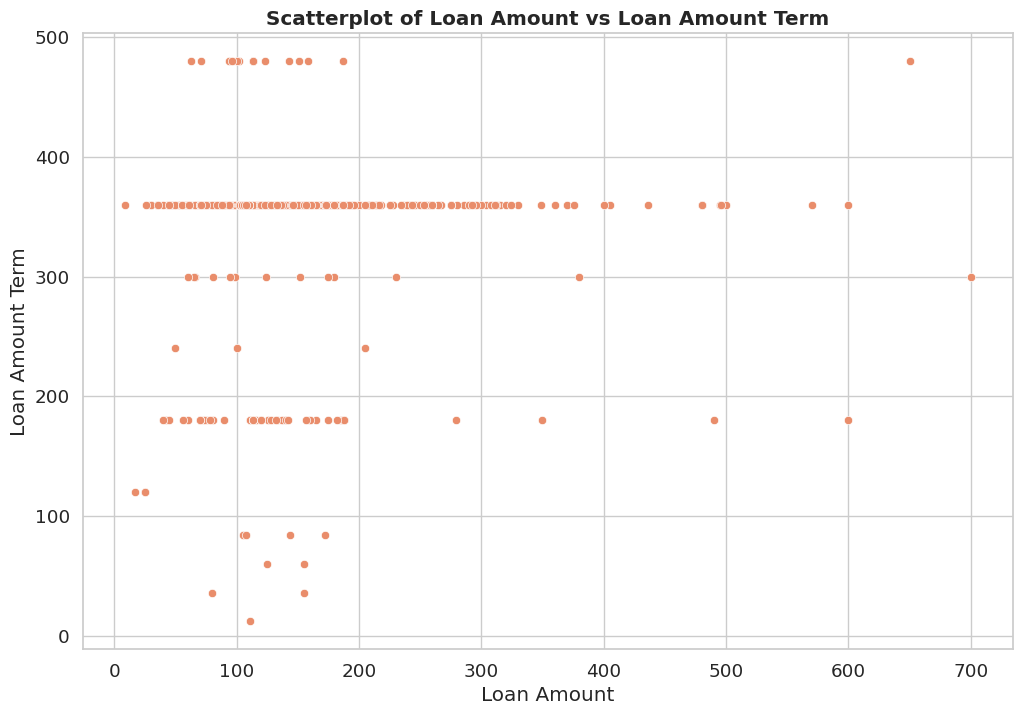

In [51]:
# Calculate the correlation between 'LoanAmount' and 'Loan_Amount_Term'
correlation = df[["LoanAmount", "Loan_Amount_Term"]].corr().iloc[0, 1]

# Print the correlation value
print("Correlation between Loan Amount and Loan Amount Term = {:.2f}".format(correlation))

# Create a scatterplot
sns.scatterplot(data=df, x="LoanAmount", y="Loan_Amount_Term")

# Set plot labels and title
plt.xlabel("Loan Amount")
plt.ylabel("Loan Amount Term")
plt.title("Scatterplot of Loan Amount vs Loan Amount Term", weight="bold")

# Show the plot
plt.show()

**There is no relationship between the loan amount and the number of repayment months**

#### `10. Pair Plot by Loan Status`

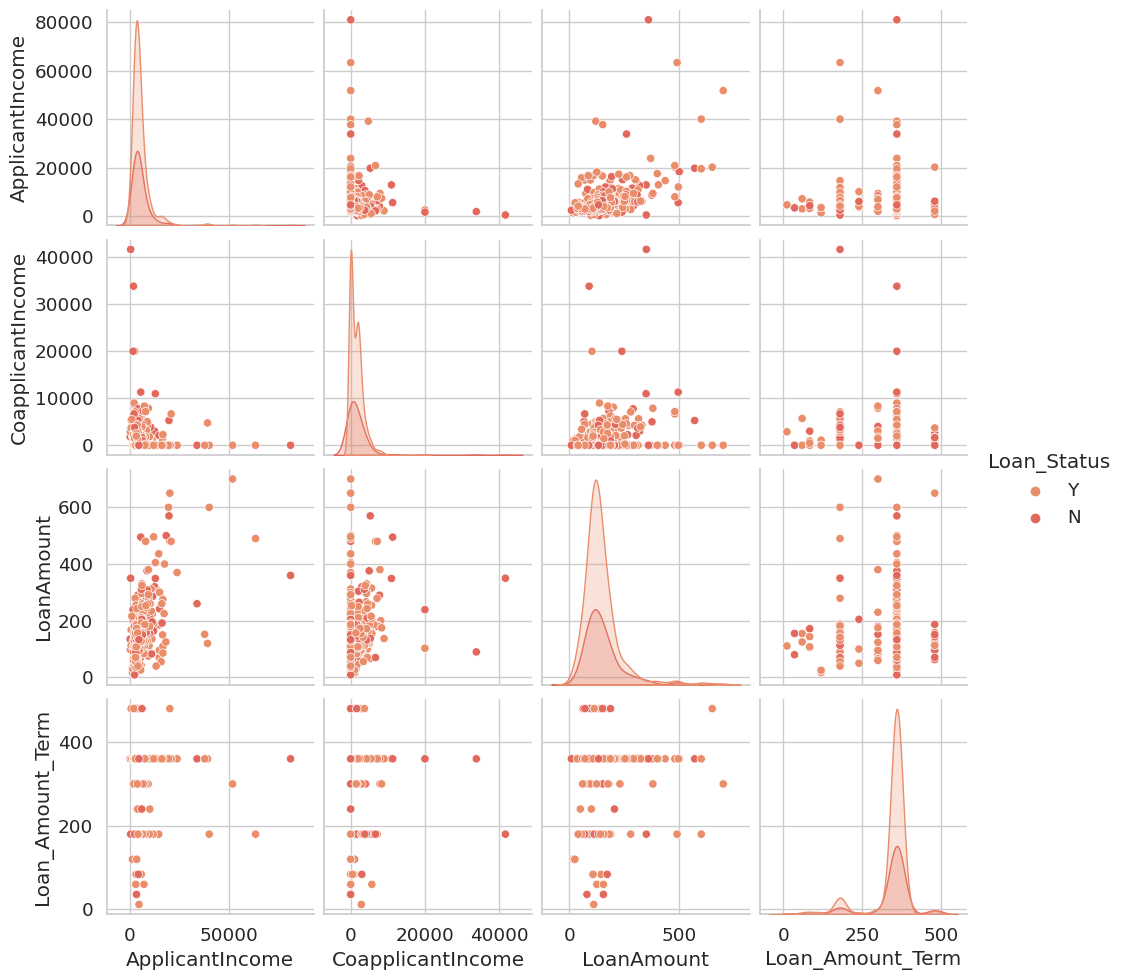

In [52]:
sns.pairplot(data=df, hue="Loan_Status")
plt.show()

#### `11. Correlation between Numerical columns`

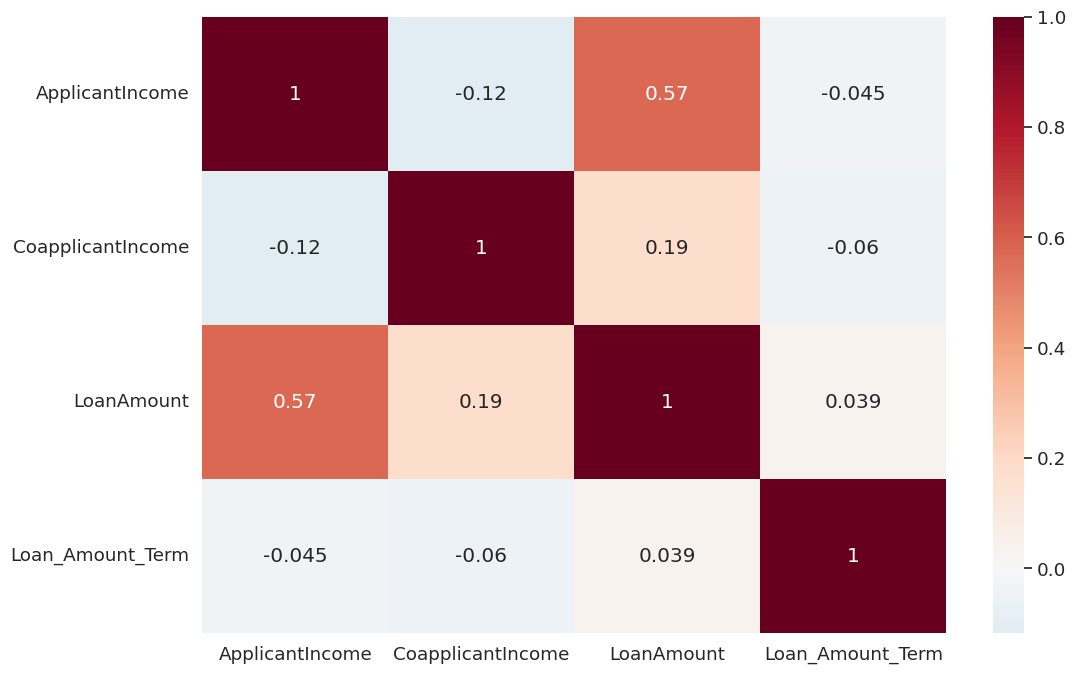

In [53]:
Numerical_cols = df.select_dtypes(include="number").columns.to_list() ## Numerical Features in the data

## Compute the correlation matrix
correlation_matrix = df.corr(numeric_only=True)

## Create the heatmap 
sns.heatmap(correlation_matrix, annot=True, cmap="RdBu_r", center=0)

plt.show()

#### `12. Correlation between Loan Amount and ApplicantIncome by Loan Status.`

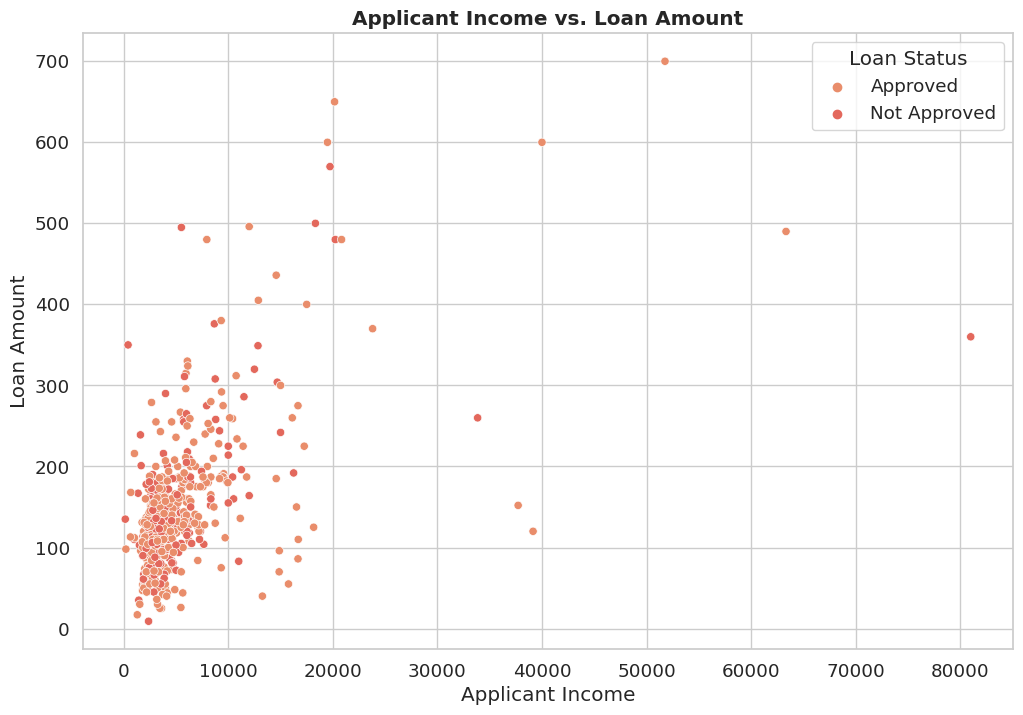

In [54]:
## Create Scatterplot
scatterplot = sns.scatterplot(data=df, x="ApplicantIncome", y="LoanAmount", hue="Loan_Status")

## title and labels
plt.title("Applicant Income vs. Loan Amount", weight="bold")
plt.xlabel("Applicant Income")
plt.ylabel("Loan Amount")

## legend settings
scatterplot.legend(title="Loan Status")
legend_labels = ["Approved", "Not Approved"]  # Custom legend labels
for t, l in zip(scatterplot.get_legend().texts, legend_labels):
    t.set_text(l)

## show the plot
plt.show()

--------------

## 4. Feature Engineering

In [55]:
df.sample()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
578,Male,Yes,One,Graduate,No,1782,2232.0,107.0,360.0,Yes,Rural,Y


In [56]:
## Copy
data = df.copy()

In [57]:
## Total Income
data["TotalIncome"] = data["ApplicantIncome"] + data["CoapplicantIncome"] 

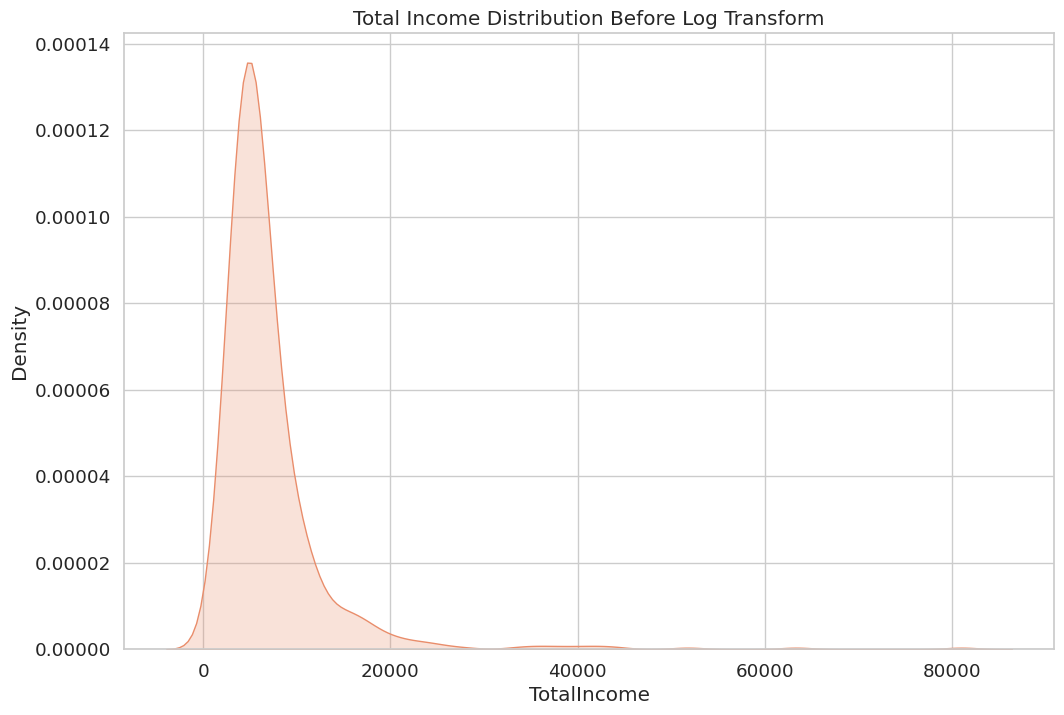

In [58]:
## Create KDE plot for total income 
sns.kdeplot(data=data, x="TotalIncome", fill=True)
plt.title("Total Income Distribution before log transform".title())
plt.show()

---